<a href="https://colab.research.google.com/github/yeonmi02/machine-learning-practice/blob/main/250409_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

## SGDClassifier

In [1]:
import pandas as pd
# 데이터 셋 불러오는 코드
fish = pd.read_csv('https://bit.ly/fish_csv')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 정답을 제외한 특성을 배열로 생성
fish_target = fish['Species'].to_numpy() # 타켓값 y값에 대해서도 배열로 변환하는 코드

In [3]:
from sklearn.model_selection import train_test_split
# 실제 훈련 데이터셋과 테스트 데이터셋을 분류
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
# 표준화 시키기위해 인포트를 하는 과정
from sklearn.preprocessing import StandardScaler
# 표준화 작업 코드
ss = StandardScaler()
ss.fit(train_input) # 학습시키는 fit 아님
train_scaled = ss.transform(train_input) # 훈련 데이터를 기준으로 스케일링 한다.
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier # 모델 입력

In [7]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 로그 손실함수 사용
sc.fit(train_scaled, train_target) # 학습 시키기
# 정확도 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target) # 부분적 학습

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


## 에포크와 과대/과소적합

In [9]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [10]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
# 훈련과 테스트 데이터를 어펜드 시킨다
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

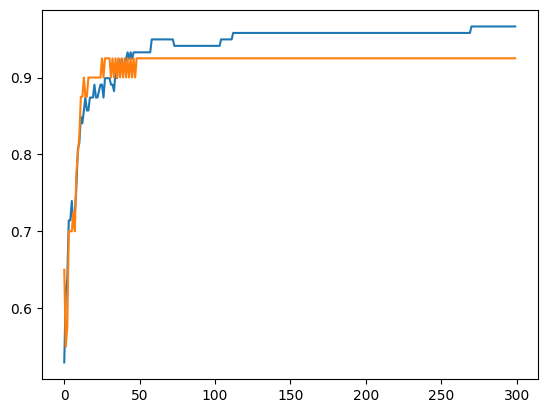

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [12]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # 조기 종료
sc.fit(train_scaled, train_target)
# 정확도 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [13]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # 힌지는 SVM의 손실함수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
